<a href="https://colab.research.google.com/github/Sarfaraz-Ali/NLP/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
from pprint import pprint

In [2]:
from sklearn.model_selection import train_test_split

In [ ]:
import nltk
nltk.download('all')

In [4]:
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('https://raw.githubusercontent.com/Pepcoders/Data-Science-March/main/NLP/Sentiment.csv')

In [6]:
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [7]:
data.iloc[0,-6]

'RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate'

In [8]:
data=data[['text','sentiment']]

In [9]:
train, test = train_test_split(data,test_size = 0.1)

In [10]:
train = train[train['sentiment'] != 'Neutral']

In [11]:
train_pos = train[train['sentiment'] == 'Positive']
train_pos = train_pos['text']

In [12]:
train_neg = train[train['sentiment'] == 'Negative']
train_neg = train_neg['text']

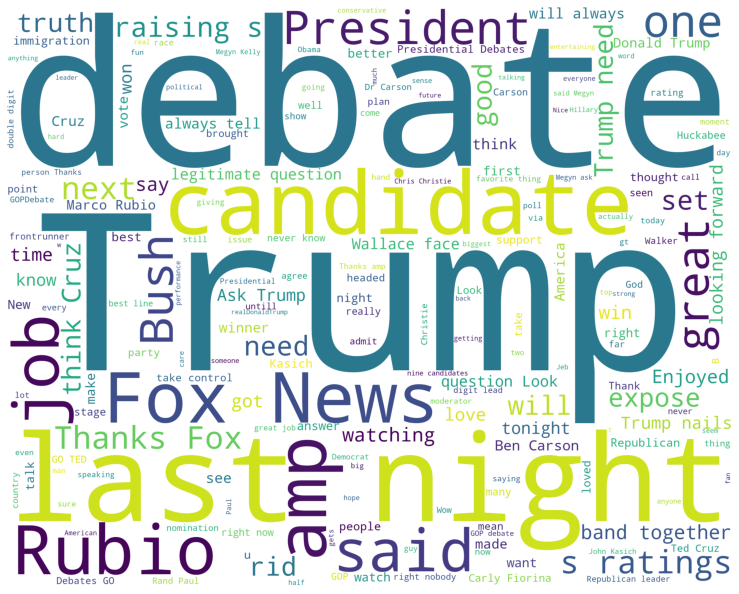

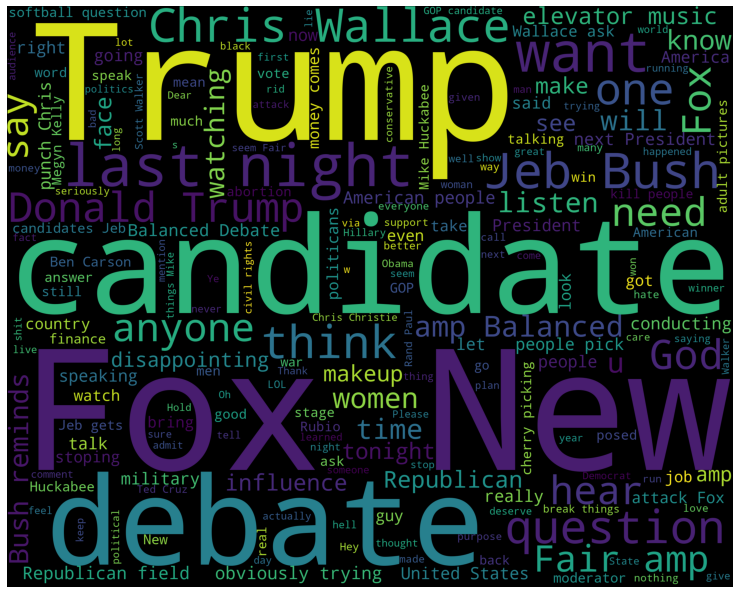

In [15]:
def workcloud_draw(data, color = 'black'):
  words = ' '.join(data)
  clean_words = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and 'RT' != word])

  wordcloud = WordCloud(stopwords = STOPWORDS, background_color = color, width = 2500, height = 2000).generate(clean_words)

  plt.figure(1,figsize=(13,13))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

workcloud_draw(train_pos, 'white')
workcloud_draw(train_neg)

In [16]:
tweets = []
stopwords_set = set(stopwords.words('english'))

In [67]:
for idx, row in train.iterrows():
  filter_words = [word.lower() for word in row['text'].split() if len(word) >= 3]
  clean_words = [word for word in filter_words if 'http' not in word and not word.startswith('@') and not word.startswith('#') and not word.startswith('&') and 'RT' != word]

  words_without_SW = [word for word in clean_words if word not in stopwords_set]
  tweets.append((words_without_SW, row['sentiment']))

In [ ]:
tweets

In [39]:
test_pos = test[test['sentiment'] == 'Positive']
test_pos = test_pos['text']

In [40]:
test_neg = test[test['sentiment'] == 'Negative']
test_neg = test_neg['text']

In [74]:
def words_in_tweet(tweets):
  tweet_words = []
  for (words, sentiment) in tweets:
    tweet_words.extend(words)
  return tweet_words
word_list = words_in_tweet(tweets)

In [75]:
def feat_in_tweets(tweet_words):
  feat_word = nltk.FreqDist(tweet_words)
  feat = feat_word.keys()
  return (feat_word, feat)
(word_freq, features) = feat_in_tweets(word_list)

In [81]:
word_freq

FreqDist({'fox': 2136, 'trump': 1906, 'news': 1222, 'last': 1094, 'like': 1064, 'jeb': 854, 'people': 832, 'candidates': 770, '&amp;': 759, 'bush': 756, ...})

In [79]:
def extract_features(document):
    document_words = set(document)
    feat_dict = {}
    for word in features:
        feat_dict[f'contains({word})'] = (word in document_words)
    return feat_dict

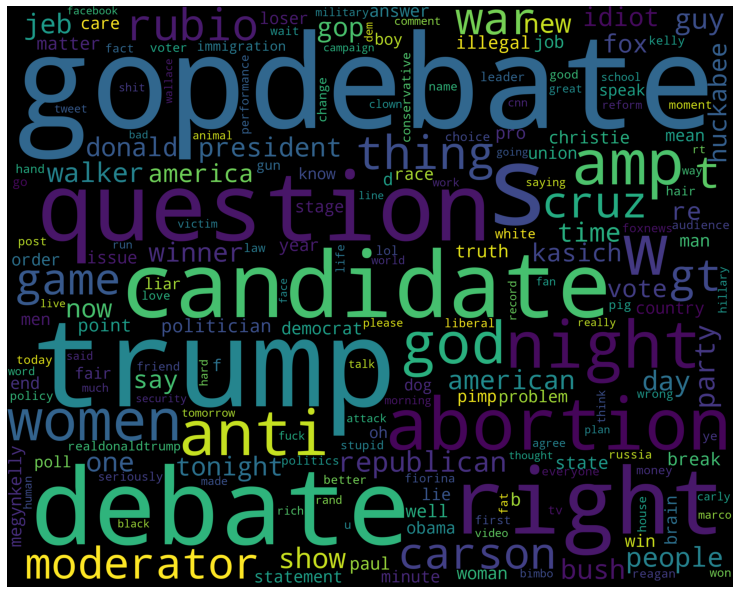

In [80]:
workcloud_draw(features)

In [82]:
training_set = nltk.classify.apply_features(extract_features, tweets)

In [83]:
classifier=nltk.NaiveBayesClassifier.train(training_set)

In [87]:
neg_cnt = 0
pos_cnt = 0
for obj in train_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt += 1
for obj in train_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt += 1
        
print(f'[Negative]: {neg_cnt}/{len(train_neg)} ')        
print(f'[Positive]: {pos_cnt}/{len(train_pos)} ')

[Negative]: 7311/7647 
[Positive]: 1615/2012 


In [89]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt += 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt += 1
        
print(f'[Negative]: {neg_cnt}/{len(test_neg)} ')        
print(f'[Positive]: {pos_cnt}/{len(test_pos)} ')

[Negative]: 773/846 
[Positive]: 124/224 


In [90]:
classifier.show_most_informative_features()

Most Informative Features
         contains(next.) = True           Positi : Negati =    149.7 : 1.0
  contains(immigration,) = True           Positi : Negati =     35.9 : 1.0
       contains(forward) = True           Positi : Negati =     34.8 : 1.0
           contains((in) = True           Positi : Negati =     31.2 : 1.0
        contains(brain,) = True           Positi : Negati =     31.2 : 1.0
        contains(rubio.) = True           Positi : Negati =     31.2 : 1.0
     contains(obviously) = True           Negati : Positi =     31.0 : 1.0
     contains(influence) = True           Negati : Positi =     30.4 : 1.0
        contains(makeup) = True           Negati : Positi =     29.1 : 1.0
        contains(field.) = True           Negati : Positi =     28.7 : 1.0
